To fill the FCC lattice 0 particles were added for a total of 340 particles.
R-squared: 0.999161
0.4887468151076078


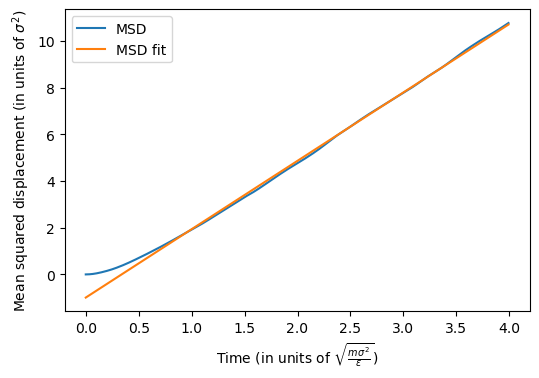

In [7]:
import skeleton_ours
from skeleton_ours import simulate, fcc_lattice, init_velocity, normal_autocorr, autocorrelation, func, specific_heat, mean_squared_displacement
import itertools
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation
import time
from scipy.optimize import curve_fit
from scipy import stats

dim = 3
num_tsteps = 1000
num_atoms = 340
box_dim = 10
timestep = 0.004
temp = 159
fill = 0





x, num_atoms = fcc_lattice(num_atoms, box_dim, dim, fill)
init_vel, sigma = init_velocity(num_atoms, temp, dim)
init_pos = x
x, v, K, U = simulate(init_pos, init_vel, num_tsteps, timestep, box_dim, num_atoms, dim, temp)
MSD, AMSD, D, TSD1 = mean_squared_displacement(x, box_dim)


plt.figure(1)
t = timestep * np.arange(0,len(AMSD))

def f(x,a):
    return a*x


#popt, pcov= curve_fit(f, t, AMSD)
#p = np.polyfit(t[100:len(AMSD)], AMSD[100:len(AMSD)], 1)
#print(p[0]/6)
#print(popt/6)
#print(sigma**2)
#plt.plot(t, p[0]*(t**2)+p[1]*t+p[2], label = 'MSD fit')
#plt.plot(t, p[0]*t+p[1], label = 'MSD fit')
plt.plot(t, AMSD, label = 'MSD')
#plt.plot(t, f(t, *popt), label ='fit from zero')
res = stats.linregress(t[100:len(AMSD)], AMSD[100:len(AMSD)])
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(t, res.intercept + res.slope*t, label='MSD fit')
plt.xlabel(r'Time (in units of $\sqrt{\frac{m\sigma^2}{\epsilon}}$)')
plt.ylabel(r'Mean squared displacement (in units of $\sigma^2$)')
plt.legend()
plt.savefig('Linear MSD.png')
print(res.slope/6)

#print(MSD[:,0])
#print(p[0]*(t**2)+p[1]*t+p[2])

In [6]:
print(res.slope/6)

0.4577639553082669


In [ ]:
len